# Chapter 3 Metropolis Hastings

## Problem 2 Gaussian PDF with Gaussian proposal

In [1]:
using Distributions, PyPlot, Plots

In [2]:
function gaussian_pdf(x)
    return exp(-((x-2).^2/.2))
end
function proposal(x)
    return x + rand(Normal(), 1)[1]
end

proposal (generic function with 1 method)

In [3]:
function generate_samples(probability, proposal, start)
    N = 100000
    thetas = zeros(N)
    x = start
    for step in collect(1:N)
        new_x = proposal(x)
        r = rand(Uniform(), 1)[1]
        a = probability(new_x)
        b = probability(x)
        accept = a./b
        if accept[1] > r
            x = new_x
        end
        thetas[step] = x
    end
    return thetas
end

generate_samples (generic function with 1 method)

In [4]:
thetas = generate_samples(gaussian_pdf, proposal, 0);

[Plots.jl] Initializing backend: pyplot



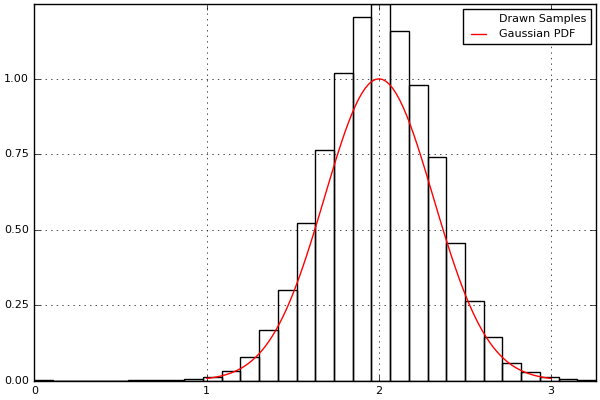

In [5]:
x = linspace(1, 3, 101)
y = gaussian_pdf(x)
Plots.histogram(thetas, normed=true, label="Drawn Samples", fill=false)
Plots.plot!(x,y, color="Red", label="Gaussian PDF")



## Problem 3 Uniform Distribution with Gaussian Proposal

In [6]:
function uniform_37(x)
    if x > 3 && x < 7
        return 0.25
    else
        return 0
    end
end

uniform_37 (generic function with 1 method)

In [7]:
uniform_thetas = generate_samples(uniform_37, proposal, 4);


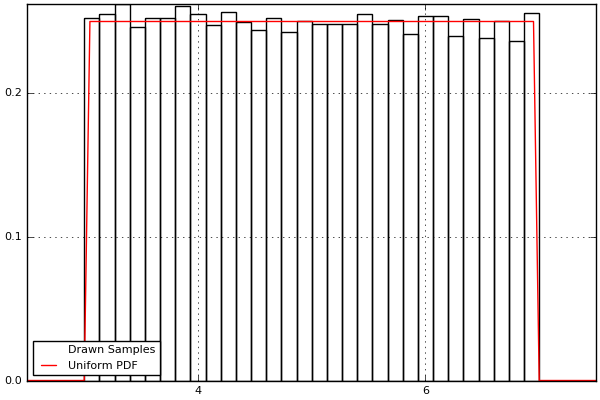

In [8]:
x = linspace(2.5, 7.5, 101)
y = [uniform_37(i) for i in x]
# TODO: find a way to vectorize this
Plots.histogram(uniform_thetas, normed=true, label="Drawn Samples", fill=false)
Plots.plot!(x,y, color="Red", label="Uniform PDF")



In order to "fix" the problem, I had to change the initialization from 0. Otherwise, no new proposals would be accepted, and the walker would not have moved anywhere.

## Problem 4 Two Dimensional Walker

### a) Density function that is Gaussian with  $\mu=0$ and $\Sigma=$  [2.0, 1.2; 1.2, 2.0] and a proposal that is Normal(0, I)

In [9]:
function gaussian_2d(x,y)
    V = [2.0 1.2 ; 1.2 2.0]
    V_inv = inv(V)
    vec = [x y]
    return exp(- vec * V_inv * vec')
end
function proposal_2d(x,y)
    return proposal(x), proposal(y)
end

proposal_2d (generic function with 1 method)

In [10]:
function generate_samples_2d(probability, proposal, startx, starty)
    N = 100000
    xs, ys = zeros(N), zeros(N)
    x, y = startx, starty
    for step in collect(1:N)
        new_x, new_y = proposal(x, y)
        r = rand(Uniform(), 1)[1]
        a = probability(new_x, new_y)
        b = probability(x, y)
        accept = a./b
        if accept[1] > r
            x = new_x
            y = new_y
        end
        xs[step] = x
        ys[step] = y

    end
    return xs, ys
end

generate_samples_2d (generic function with 1 method)

In [11]:
xs, ys = generate_samples_2d(gaussian_2d, proposal_2d, 0, 0);


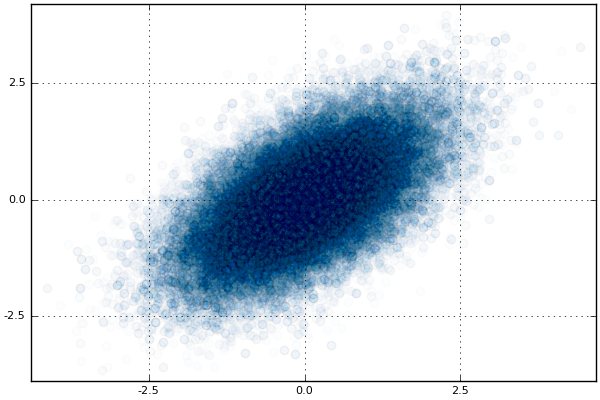

In [12]:
Plots.scatter(xs, ys, alpha=0.01, legend=false)


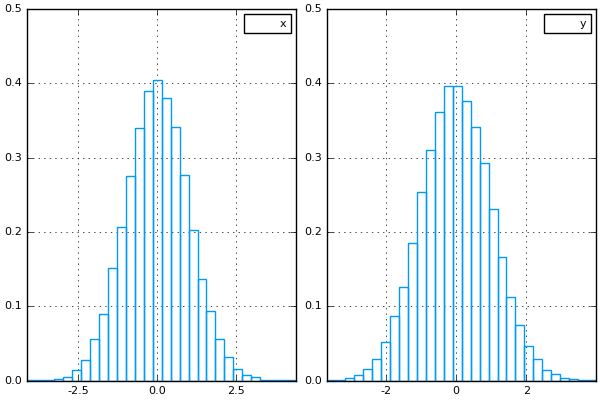

In [13]:
Plots.plot([xs ys], layout=2, seriestype = [:hist :hist], labels=["x" "y"],
            normed=true, fill=false, ylim=(0,0.5))

### b) Density function that is uniform for 3 < x < 7 and 1 < y < 9 and a proposal that is Normal(0, I)

In [14]:
function uniform_37_19(x, y)
    if 3 < x < 7 && 1 < y < 9
        return 1.0/32
    else
        return 0
    end
end

uniform_37_19 (generic function with 1 method)

In [15]:
xs, ys = generate_samples_2d(uniform_37_19, proposal_2d, 5, 7);


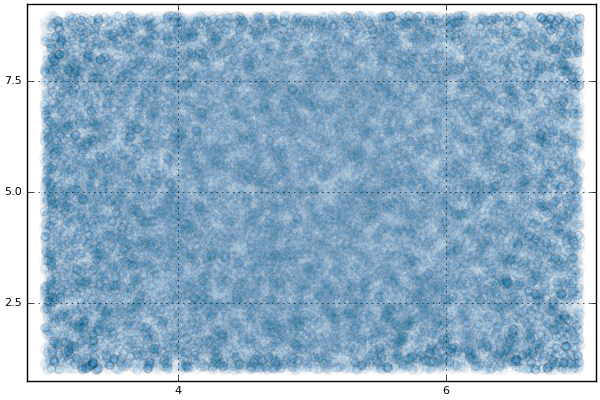

In [16]:
Plots.scatter(xs, ys, alpha=0.01, legend=false)


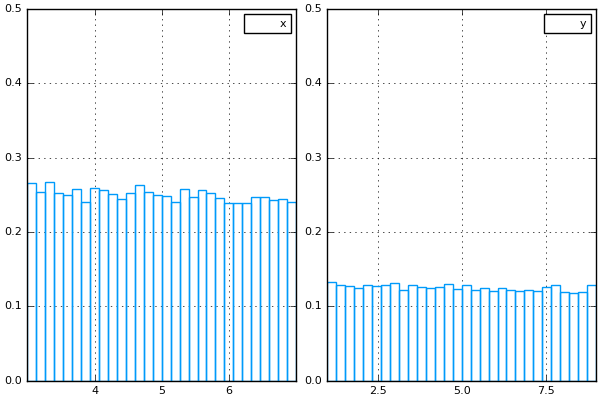

In [17]:
Plots.plot([xs ys], layout=2, seriestype = [:hist :hist], labels=["x" "y"],
            normed=true, fill=false, ylim=(0,0.5))

## Problem 5 Modifying the variance of the proposal

In [18]:
function proposal_scaled(x, var)
    return x + rand(Normal(0, var), 1)[1]
end
function proposal_2d_scaled(x, y, var)
    return proposal_scaled(x, var), proposal_scaled(y, var)
end

proposal_2d_scaled (generic function with 1 method)

In [19]:
variances = [.1 .5 1 2 5 10 25 100]

1x8 Array{Float64,2}:
 0.1  0.5  1.0  2.0  5.0  10.0  25.0  100.0

In [20]:
allx, ally = [], []
for v = variances
    prop = (x, y) -> proposal_2d_scaled(x, y, v)
    xs, ys = generate_samples_2d(gaussian_2d, prop, 0, 0);
    append!(allx, xs)
    append!(ally, ys)
end


In [21]:
N = length(allx)
num_cols = length(variances)
num_rows = Int(N / num_cols)
allx = reshape(allx, (num_rows, num_cols))
ally = reshape(ally, (num_rows, num_cols))

100000x8 Array{Any,2}:
 -0.0060281    0.0        0.0       0.0       …  0.0      0.0        0.0     
 -0.0344668   -1.07492    0.0       0.0          0.0      0.0        0.0     
  0.00675814  -0.925375   0.0       0.0          0.0      0.0        0.0     
  0.0479696   -0.925375   0.0       0.0          0.0      0.0        0.0     
  0.168133    -0.708445   0.0       0.966939     0.0      0.0        0.0     
  0.182458    -0.9125     0.0       0.966939  …  0.0      0.0        0.0     
  0.296118    -0.862793  -1.3528    0.966939     0.0      0.0        0.0     
  0.324704    -0.856103  -1.3528    0.966939     0.0      0.0        0.0     
  0.224549    -0.856103  -0.945689  0.966939     0.0      0.0        0.0     
  0.305004    -0.956108  -1.44766   0.966939     0.0      0.0        0.0     
  0.153394    -0.89103   -0.468153  0.966939  …  0.0      0.0        0.0     
  0.199653    -1.28497   -0.468153  0.966939     0.0      0.0        0.0     
  0.166828    -1.33424   -0.513901  0.966


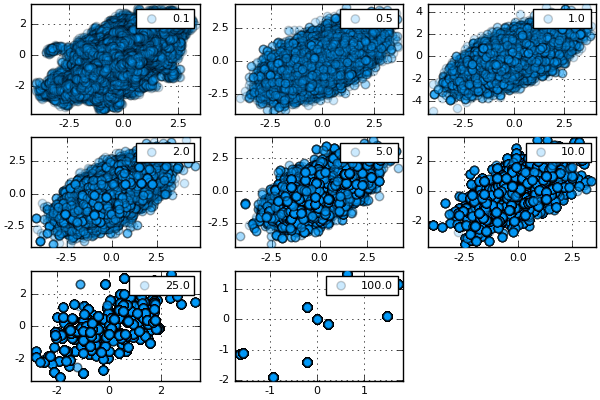

In [22]:
Plots.scatter(allx, ally, alpha=0.2, layout=8, labels=variances)

What we find is that extreme values of the proposal variance don't find representative samples of the distribution. For small step sizes, the points look muddled because the walkers aren't going very far at every step. This leads to samples that have a high autocorrelation time.

With larger step sizes, samples are less likely to be correlated. However, the prohibitively large step size leads to many rejected candidates, lowering the number of unique samples we get.

## Problem 6 - Modifying the proposal distribution mean

One extremely important reason for giving the proposal distribution zero mean stems from the desire to make $q(x | x') = q(x' | x)$ (i.e. you should be able to go between samples with equal probability). A proposal distribution with nonzero mean would bias walkers to move in one direction and not explore the space fairly.

In [23]:
function proposal_biased(x, y)
    return proposal(x) + 0.5, proposal(y) + 0.5
end

proposal_biased (generic function with 1 method)

In [24]:
xs, ys = generate_samples_2d(gaussian_2d, proposal_biased, 0, 0);


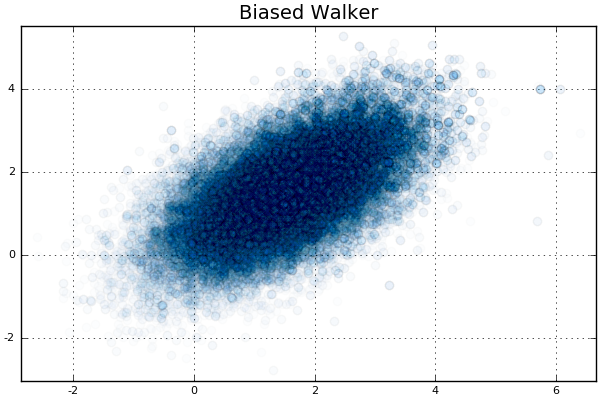

In [25]:
Plots.scatter(xs, ys, alpha=0.01, legend=false, title="Biased Walker")

Here we can clearly see the effect that an asymmetric proposal distribution has on the sampling since (0, 0) no longer corresponds to the peak.

### Bonus: Modify the acceptance-rejection criterion to deal with asymmetric $q$

Is the point simply to take $f(x')/f(x-\mu)$ instead of $f(x')/f(x)$?